In [1]:
import os

train_path = 'Dataset/lunar/train'
test_path = 'Dataset/lunar/test'

def folder_analysis(folder_path):
    for root, dirs, files in os.walk(folder_path):
        print(f"Directory: {root}")
        print(f"Subdirectories: {dirs}")
        print(f"Files: {files[:5]}")  # Show only first 5 files
        print(f"Total Files: {len(files)}")
        print("\n")


folder_analysis(train_path)
folder_analysis(test_path)

Directory: Dataset/lunar/train
Subdirectories: []
Files: ['13.npz', '81.npz', '20.npz', '34.npz', '7.npz']
Total Files: 400


Directory: Dataset/lunar/test
Subdirectories: []
Files: ['159.npz', '165.npz', '141.npz', '171.npz', '71.npz']
Total Files: 200




In [2]:
import numpy as np
import os

train_path = 'Dataset/lunar/train'
test_path = 'Dataset/lunar/test'

def read_npz(file_path):
    
    data = np.load(file_path)
    print(f"\nReading: {file_path}")
    print(f"Keys: {list(data.keys())}")
    
    for key in data.files:
        print(f" - {key}: shape {data[key].shape}, dtype {data[key].dtype}")

sample_train_files = [os.path.join(train_path, f) for f in os.listdir(train_path)[:3]]
sample_test_files = [os.path.join(test_path, f) for f in os.listdir(test_path)[:3]]

print("Train Data Samples:")
for file in sample_train_files:
    read_npz(file)

print("\nTest Data Samples:")
for file in sample_test_files:
    read_npz(file)

Train Data Samples:

Reading: Dataset/lunar/train/13.npz
Keys: ['imgs', 'acts', 'states', 'states25', 'states10', 'states5']
 - imgs: shape (69, 80, 120, 3), dtype uint8
 - acts: shape (69,), dtype int64
 - states: shape (69, 8), dtype float32
 - states25: shape (69, 8), dtype float32
 - states10: shape (69, 8), dtype float32
 - states5: shape (69, 8), dtype float32

Reading: Dataset/lunar/train/81.npz
Keys: ['imgs', 'acts', 'states', 'states25', 'states10', 'states5']
 - imgs: shape (106, 80, 120, 3), dtype uint8
 - acts: shape (106,), dtype int64
 - states: shape (106, 8), dtype float32
 - states25: shape (106, 8), dtype float32
 - states10: shape (106, 8), dtype float32
 - states5: shape (106, 8), dtype float32

Reading: Dataset/lunar/train/20.npz
Keys: ['imgs', 'acts', 'states', 'states25', 'states10', 'states5']
 - imgs: shape (88, 80, 120, 3), dtype uint8
 - acts: shape (88,), dtype int64
 - states: shape (88, 8), dtype float32
 - states25: shape (88, 8), dtype float32
 - states1

In [3]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
# Data Loader Function (Fixed)
def load_npz(file_path):
    """Loads all images from a .npz file and preprocesses them."""
    file_path = file_path.decode("utf-8")  # Decode TensorFlow byte string
    npz_data = np.load(file_path)
    imgs = npz_data["imgs"].astype(np.float32) / 255.0  # Normalize to [0,1]
    return imgs  # Return all images in the file

In [6]:
file_list = [os.path.join(train_path, f) for f in os.listdir(train_path)]

dataset = tf.data.Dataset.from_tensor_slices(file_list)
dataset = dataset.map(lambda x: tf.numpy_function(load_npz, [x], [tf.float32]), num_parallel_calls=tf.data.experimental.AUTOTUNE)
dataset = dataset.unbatch().shuffle(1000).batch(16).prefetch(tf.data.experimental.AUTOTUNE)


Training VAE with latent size 128


2025-02-04 09:06:55.939121: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201


Epoch 1/100, Loss: 18.6001
Epoch 2/100, Loss: 3.1534
Epoch 3/100, Loss: 3.0077
Epoch 4/100, Loss: 2.9793
Epoch 5/100, Loss: 2.9690
Epoch 6/100, Loss: 2.9587
Epoch 7/100, Loss: 2.9484
Epoch 8/100, Loss: 2.9443
Epoch 9/100, Loss: 2.9406
Epoch 10/100, Loss: 2.9369
Epoch 22/100, Loss: 2.9289
Epoch 23/100, Loss: 2.9264
Epoch 24/100, Loss: 2.9273
Epoch 37/100, Loss: 2.9291
Epoch 38/100, Loss: 2.9261
Epoch 39/100, Loss: 2.9287
Epoch 40/100, Loss: 2.9294
Epoch 41/100, Loss: 2.9304
Epoch 42/100, Loss: 2.9287
Epoch 43/100, Loss: 2.9251
Epoch 44/100, Loss: 2.9265
Epoch 45/100, Loss: 2.9270
Epoch 46/100, Loss: 2.9281
Epoch 47/100, Loss: 2.9258
Epoch 48/100, Loss: 2.9273
Epoch 49/100, Loss: 2.9285
Epoch 50/100, Loss: 2.9296
Epoch 51/100, Loss: 2.9271
Epoch 52/100, Loss: 2.9270
Epoch 53/100, Loss: 2.9300
Epoch 54/100, Loss: 2.9301
Epoch 55/100, Loss: 2.9278
Epoch 56/100, Loss: 2.9302
Epoch 57/100, Loss: 2.9312
Epoch 58/100, Loss: 2.9285
Epoch 59/100, Loss: 2.9280
Epoch 60/100, Loss: 2.9304
Epoch 61/

AttributeError: 'tuple' object has no attribute 'numpy'

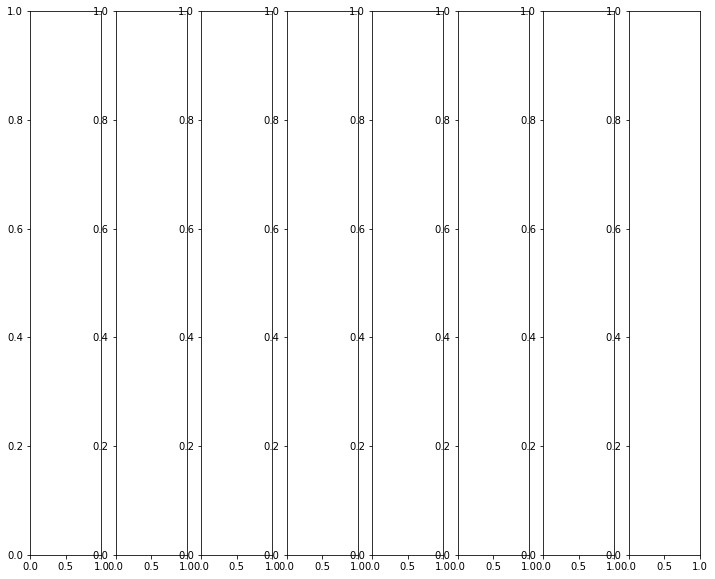

In [7]:
IMG_SHAPE = (80, 120, 3)

class VAE(keras.Model):
    def __init__(self, latent_dim):
        super(VAE, self).__init__()
        self.latent_dim = latent_dim

        # Encoder
        self.encoder = keras.Sequential([
            layers.InputLayer(input_shape=IMG_SHAPE),
            layers.Conv2D(32, 4, strides=2, padding='same', activation='relu'),
            layers.Conv2D(64, 4, strides=2, padding='same', activation='relu'),
            layers.Conv2D(128, 4, strides=2, padding='same', activation='relu'),
            layers.Flatten(),
            layers.Dense(latent_dim + latent_dim)  # mu and logvar
        ])

        # Decoder
        self.decoder = keras.Sequential([
            layers.InputLayer(input_shape=(latent_dim,)),
            layers.Dense(10 * 15 * 128, activation="relu"),
            layers.Reshape((10, 15, 128)),
            layers.Conv2DTranspose(64, 4, strides=2, padding='same', activation='relu'),
            layers.Conv2DTranspose(32, 4, strides=2, padding='same', activation='relu'),
            layers.Conv2DTranspose(3, 4, strides=2, padding='same', activation='sigmoid')  # Output in [0,1]
        ])

    def reparameterize(self, mu, logvar):
        eps = tf.random.normal(shape=tf.shape(mu))
        return mu + tf.exp(0.5 * logvar) * eps

    def call(self, x):
        z_params = self.encoder(x)
        mu, logvar = tf.split(z_params, num_or_size_splits=2, axis=1)
        z = self.reparameterize(mu, logvar)
        x_recon = self.decoder(z)
        return x_recon, mu, logvar

# Loss Function
def vae_loss(x, x_recon, mu, logvar):
    recon_loss = keras.losses.MeanSquaredError()(x, x_recon)
    kl_loss = -0.5 * tf.reduce_mean(1 + logvar - tf.square(mu) - tf.exp(logvar))
    return recon_loss + kl_loss

# Training Loop
def train_vae(latent_dim, epochs=100):
    model = VAE(latent_dim)
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    
    for epoch in range(epochs):
        total_loss = 0
        for batch in dataset:
            with tf.GradientTape() as tape:
                x_recon, mu, logvar = model(batch)
                loss = vae_loss(batch, x_recon, mu, logvar)
            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))
            total_loss += loss.numpy()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")
    return model

# Train VAEs with Different Latent Sizes
latent_sizes = [128]
models = {}

for latent_dim in latent_sizes:
    print(f"\nTraining VAE with latent size {latent_dim}")
    models[latent_dim] = train_vae(latent_dim, epochs=100)

# Generate and Compare Reconstructions
fig, axes = plt.subplots(len(latent_sizes), 8, figsize=(12, 10))

for i, latent_dim in enumerate(latent_sizes):
    model = models[latent_dim]
    
    # Get Sample Batch
    sample_batch = next(iter(dataset)).numpy()[:8]
    recon_batch, _, _ = model(sample_batch)
    
    # Plot Original & Reconstructed Images
    for j in range(8):
        axes[i, j].imshow(sample_batch[j])
        axes[i, j].axis('off')
    axes[i, 0].set_ylabel(f"Latent {latent_dim}", fontsize=12)

plt.suptitle("Original Images (Top) vs Reconstructions (Bottom)", fontsize=14)
plt.show()

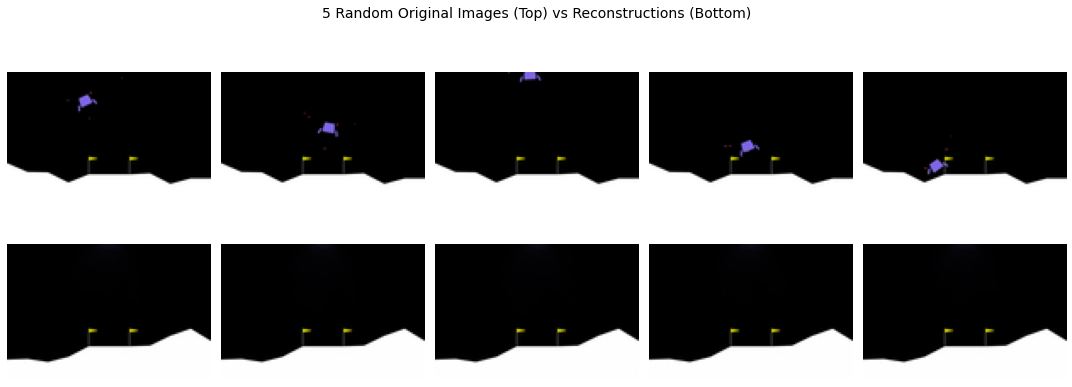

In [15]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ... (Keep the data loading and processing parts unchanged)

# -----------------------
# 3. Randomly Select 5 Images for Visualization
# -----------------------
n_samples = 5  # number of random image pairs to visualize
total_images = len(all_originals)

# Ensure there are at least 5 images in the test set
if total_images < n_samples:
    raise ValueError(f"Not enough images: found {total_images}, but need {n_samples}")

# Randomly select 5 unique indices
random_indices = np.random.choice(total_images, size=n_samples, replace=False)
selected_originals = all_originals[random_indices]
selected_reconstructions = all_reconstructed[random_indices]

# -----------------------
# 4. Plot the Selected Images
# -----------------------
# Define grid: 5 columns, 2 rows (one for originals, one for reconstructions)
cols = 5
rows = 2

fig, axes = plt.subplots(rows, cols, figsize=(15, 6))

for i in range(n_samples):
    # Plot original image on the top row
    axes[0, i].imshow(selected_originals[i])
    axes[0, i].axis('off')
    
    # Plot reconstructed image on the bottom row
    axes[1, i].imshow(selected_reconstructions[i])
    axes[1, i].axis('off')

# Add row labels for clarity
axes[0, 0].set_ylabel("Original", fontsize=12)
axes[1, 0].set_ylabel("Reconstructed", fontsize=12)

plt.suptitle("5 Random Original Images (Top) vs Reconstructions (Bottom)", fontsize=14)
plt.tight_layout()
plt.show()

---

---


Training VAE with latent size 128
Epoch 50/500, Loss: 174058.5156
Epoch 100/500, Loss: 170687.4375
Epoch 150/500, Loss: 169498.8594
Epoch 200/500, Loss: 168874.4062
Epoch 250/500, Loss: 168479.5469
Epoch 300/500, Loss: 168194.8750
Epoch 350/500, Loss: 167990.9062
Epoch 500/500, Loss: 167549.7812


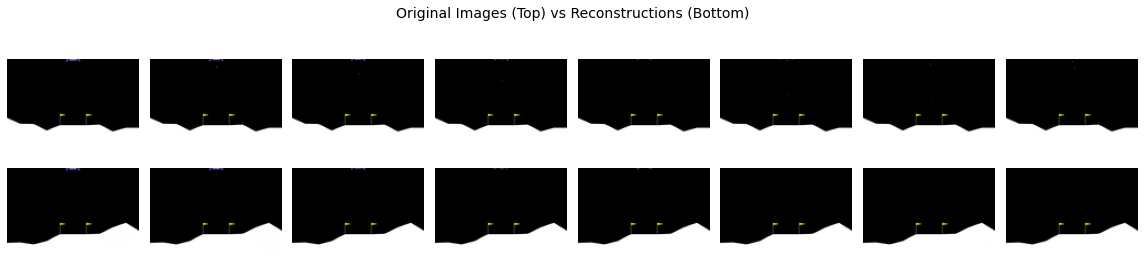

In [19]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Paths
train_path = 'Dataset/lunar/train'
test_path = 'Dataset/lunar/test'

# Image shape
IMG_SHAPE = (80, 120, 3)

# Data loading function
def load_npz(file_path):
    """Loads all images from a .npz file and preprocesses them."""
    file_path = file_path.decode("utf-8")  # Decode bytes to string
    npz_data = np.load(file_path)
    imgs = npz_data["imgs"].astype(np.float32) / 255.0  # Normalize to [0,1]
    return imgs  # Return all images

# Create Dataset
train_file_list = [os.path.join(train_path, f) for f in os.listdir(train_path)]
train_dataset = tf.data.Dataset.from_tensor_slices(train_file_list)
train_dataset = train_dataset.map(lambda x: tf.numpy_function(load_npz, [x], [tf.float32]), num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.unbatch().batch(32).prefetch(tf.data.experimental.AUTOTUNE)

# VAE Model
class VAE(keras.Model):
    def __init__(self, latent_dim):
        super(VAE, self).__init__()
        self.latent_dim = latent_dim

        # Encoder
        self.encoder = keras.Sequential([
            layers.InputLayer(input_shape=(80, 120, 3)),
            layers.Conv2D(32, 3, strides=2, padding='same', activation='relu'),
            layers.Conv2D(64, 3, strides=2, padding='same', activation='relu'),
            layers.Flatten(),
            layers.Dense(latent_dim * 2)
        ])

        # Decoder
        self.decoder = keras.Sequential([
            layers.InputLayer(input_shape=(latent_dim,)),
            layers.Dense(20 * 30 * 64, activation='relu'),
            layers.Reshape((20, 30, 64)),
            layers.Conv2DTranspose(32, 3, strides=2, padding='same', activation='relu'),
            layers.Conv2DTranspose(3, 3, strides=2, padding='same', activation='sigmoid')
        ])

    def reparameterize(self, mu, logvar):
        eps = tf.random.normal(shape=tf.shape(mu))
        return mu + tf.exp(0.5 * logvar) * eps

    def call(self, x):
        z_params = self.encoder(x)
        mu, logvar = tf.split(z_params, num_or_size_splits=2, axis=1)
        z = self.reparameterize(mu, logvar)
        x_recon = self.decoder(z)
        return x_recon, mu, logvar

# Loss Function
def vae_loss(x, x_recon, mu, logvar):
    recon_loss = tf.reduce_mean(tf.reduce_sum(keras.losses.binary_crossentropy(x, x_recon), axis=[1, 2]))
    kl_loss = -0.5 * tf.reduce_mean(tf.reduce_sum(1 + logvar - tf.square(mu) - tf.exp(logvar), axis=1))
    return recon_loss + 0.1 * kl_loss

# Training Loop
@tf.function
def train_step(model, x, optimizer):
    with tf.GradientTape() as tape:
        x_recon, mu, logvar = model(x)
        loss = vae_loss(x, x_recon, mu, logvar)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

def train_vae(latent_dim, epochs=500):
    model = VAE(latent_dim)
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    
    for epoch in range(epochs):
        total_loss = 0
        for batch in train_dataset:
            loss = train_step(model, batch[0], optimizer)
            total_loss += loss
        
        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")
    
    return model

# Train VAE
latent_dim = 128
print(f"\nTraining VAE with latent size {latent_dim}")
vae_model = train_vae(latent_dim, epochs=500)

# Generate and Compare Reconstructions
test_file_list = [os.path.join(test_path, f) for f in os.listdir(test_path)]
test_dataset = tf.data.Dataset.from_tensor_slices(test_file_list)
test_dataset = test_dataset.map(lambda x: tf.numpy_function(load_npz, [x], [tf.float32]), num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.unbatch().batch(8).prefetch(tf.data.experimental.AUTOTUNE)

fig, axes = plt.subplots(2, 8, figsize=(16, 4))

# Get Sample Batch
sample_batch = next(iter(test_dataset))
recon_batch, _, _ = vae_model(sample_batch[0])

# Plot Original & Reconstructed Images
for j in range(8):
    axes[0, j].imshow(sample_batch[0][j])
    axes[0, j].axis('off')
    axes[1, j].imshow(recon_batch[j])
    axes[1, j].axis('off')

axes[0, 0].set_ylabel("Original", fontsize=12)
axes[1, 0].set_ylabel("Reconstructed", fontsize=12)

plt.suptitle("Original Images (Top) vs Reconstructions (Bottom)", fontsize=14)
plt.tight_layout()
plt.show()